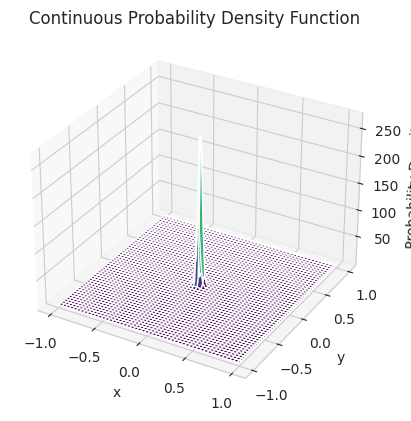

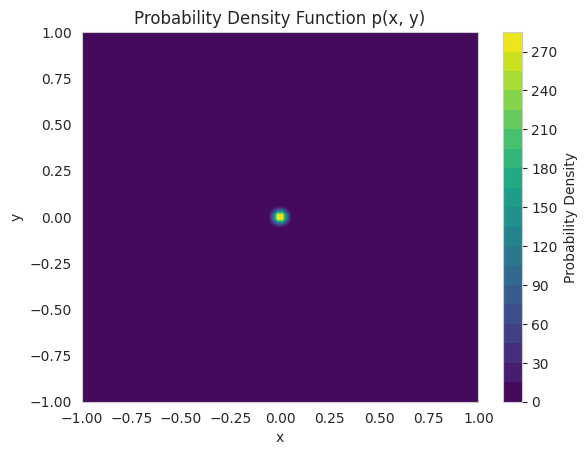

In [56]:
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from matplotlib import cm 

def inverse_function(L):
    epsilon = 1e-8  # Small constant to avoid division by zero
    return 1 / (L + epsilon)

def construct_probability_density(points, L_values):
    # Calculate the inverse of L_values
    inverse_values = inverse_function(L_values)

    # Normalize the inverse values
    normalized_values = inverse_values / np.sum(inverse_values)
    
    # Create a Gaussian KDE object
    pts = np.vstack([point for point in points]).T
    kde = gaussian_kde(pts, weights=normalized_values)
    return kde

def L(x, y):
    return (x - y)**2

# Example usage
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)

points = [(X[i][j], Y[i][j]) for i in range(X.shape[0]) for j in range(X.shape[1])]
L_values = np.array([L(x, y) for x, y in points])

# Construct the probability density function p(x, y)
p = construct_probability_density(points, L_values)

# Generate a grid of points for visualization
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
positions = np.vstack([X.ravel(), Y.ravel()])

# Evaluate the probability density function at the grid points
Z = np.reshape(p(positions).T, X.shape)

# Create a plot of the probability density function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Probability Density')
ax.set_title('Continuous Probability Density Function')

# Show the plot
plt.show()

plt.contourf(X, Y, Z, levels=20, cmap=cm.viridis)
plt.colorbar(label="Probability Density")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Probability Density Function p(x, y)")
plt.show()

(array([ 3., 10., 15., 11., 13., 17., 18., 10.,  2.,  1.]),
 array([-1.43593123, -1.1184682 , -0.80100517, -0.48354214, -0.16607912,
         0.15138391,  0.46884694,  0.78630996,  1.10377299,  1.42123602,
         1.73869905]),
 <BarContainer object of 10 artists>)

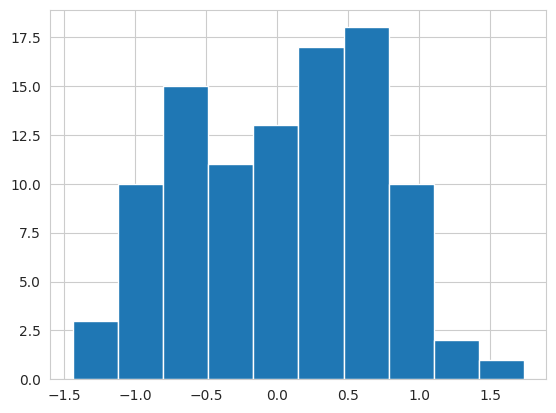

In [54]:
plt.hist(p.resample(100)[0])